In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns in the output
pd.set_option('display.max_rows', None)  # Show all rows in the output

In [3]:
X = pd.read_csv('/home/mpradhan/Intern_Research_Project/data/nnmf_output.csv', nrows=1000)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,410.125899,154.236460,64.686801,58.537401,0.000000,1.507580,8.029755,0.000000,0.147689,0.086019,18.363941,17.677414,0.828686,0.000000,2.398400,0.000000,32.241980,8.029921,23.883865,4.697880,0.881019,4.620595,8.960208,0.868897,0.000000,0.156289,8.064452,2.491334,26.549567,30.455634,24.339210,0.740215,3.480699,0.130246,7.957086,5.794091,1.206147,45.153058,0.722344,0.715953,0.026783,0.581202,7.972335,0.000000,15.177695,9.733217,15.390142,6.748024,14.426512,4.790207,16.766783,3.968707,10.336772,19.705140,0.007806,8.062117,2.926104,35.199012,2.192069,6.600568,32.801831,3.171849,0.746631,9.153273,15.849783,6.626428,0.087984,4.458088,19.483494,3.308029,0.933561,1.149335,27.963251,15.570018,3.163401,0.456263,2.100469,14.936638,1.443517,3.084241,15.876289,17.067090,0.468126,9.545376,0.807633,21.941145,1.265324,0.000000,6.543781,25.643159,9.572828,1.859542,1.909371,3.531698,22.416234,5.564210,12.691314,0.632203,19.938189,0.684975,0.000000,0.506172,17.838120,3.091017,2.975088,12.719906,14.737957,7.724362,5.203348,22.328756,5.762664,4.344185,3.150382,13.635715,1.306368,10.292291,1.659170,0.789886,19.200716,27.549924,0.210544,19.331129,5.284639,0.000000,0.535242,28.206259,0.000000,0.000000
1,309.260095,114.638875,48.958103,40.543146,0.406111,0.013419,11.959914,0.452579,0.000000,5.269839,19.600706,20.334539,0.235606,0.214836,3.550794,6.700123,30.557417,7.367900,17.137766,3.001868,0.725046,11.344426,10.813648,0.175224,1.125229,1.877616,10.333128,13.008059,27.676706,34.241613,16.916815,0.541261,2.449742,7.081116,12.671170,11.828735,1.184207,43.341929,1.846208,0.568607,8.552658,2.734379,18.081196,0.003856,11.138665,11.140607,16.397473,6.744154,16.499940,0.951678,12.477798,0.409982,13.805005,14.561884,0.890727,7.820643,0.419813,22.885423,2.062646,5.649770,26.752839,11.507916,4.029741,10.516002,20.693607,4.324421,11.583578,19.838293,26.092237,3.227743,3.090824,6.795331,21.900082,19.932177,13.865590,1.945048,6.420212,31.220062,19.659531,9.242492,14.750911,20.374941,0.088177,0.658322,6.493960,29.396451,0.044060,4.187417,1.163143,20.365996,2.785237,0.001305,0.315028,1.152913,24.103770,5.469978,8.232528,3.804153,23.517073,0.007977,6.939794,0.000974,18.182170,14.665236,10.042817,10.301359,7.524158,8.784195,2.624120,15.975620,11.904758,7.863046,9.890693,16.653125,1.057083,20.376752,0.922528,0.069203,18.782673,17.875527,0.000000,13.477412,5.850606,0.006311,7.601224,34.079079,1.128110,0.140893
2,508.717420,188.736330,75.185555,69.850694,0.152396,0.488946,15.329227,0.001078,7.942683,0.777966,26.755424,26.333302,0.016597,0.113706,0.260086,4.040114,37.401399,8.809496,30.833614,1.175185,0.163685,3.850287,0.323684,0.747365,0.202153,2.003714,4.584505,0.698252,27.489424,31.403972,20.162712,0.193483,0.119927,0.000000,0.000000,0.000000,0.077542,41.044420,0.000000,0.000000,0.000000,0.000000,1.499409,0.000000,4.577899,0.516578,13.700778,4.992921,13.112885,0.030382,16.913199,0.000000,2.139739,10.682091,0.346724,9.717015,0.000000,22.061114,0.028697,0.014954,33.348977,2.933705,2.120050,7.173177,20.456895,9.982920,1.121989,0.000000,11.158039,0.338692,5.083375,6.651344,29.691745,17.549799,0.557608,0.023340,0.783209,6.109708,8.736291,3.445544,11.385893,14.432458,0.050937,12.943752,1.384091,28.220836,1.711678,0.376733,0.000000,29.969692,1.098467,0.267886,2.073223,0.247377,6.067600,0.000000,8.738113,0.000000,14.545648,0.002001,1.377821,0.000000,12.483065,4.745541,1.437521,6.272743,10.232509,12.079342,2.816014,16.089422,11.025884,15.271008,6.480251,7.547437,5.364067,17.202007,0.000000,0.499088,19.696673,24.773092,0.000000,17.658732,0.946702,0.270740,0.148922,32.617613,0.14703

In [2]:
from sklearn.decomposition import NMF

# Path to the master file
file_path = '/home/mpradhan/Intern_Research_Project/data/X_master_dense.csv'

# 1. Read the master file
X = pd.read_csv(file_path)

# 2. Apply Non-Negative Matrix Factorization (NMF)
# Remove non-numeric columns if any (optional)
X_numeric = X.select_dtypes(include=[float, int])

# Drop rows with any NaN values
X_numeric = X_numeric.dropna()

# Show the shape after dropping
print(X_numeric.shape)

# Get min and max for each column
range_summary = pd.DataFrame({
    'min': X_numeric.min(),
    'max': X_numeric.max()
}).reset_index().rename(columns={'index': 'Feature'})

print(range_summary)

(11179128, 128)
                     Feature      min      max
0      cat__residue_name_ALA      0.0      1.0
1      cat__residue_name_ARG      0.0      1.0
2      cat__residue_name_ASN      0.0      1.0
3      cat__residue_name_ASP      0.0      1.0
4      cat__residue_name_CYS      0.0      1.0
..                       ...      ...      ...
123  num__hbond_O_NH2_energy -14381.0  16515.0
124         num__is_aromatic      0.0      1.0
125            num__is_polar      0.0      1.0
126          num__is_charged      0.0      1.0
127      num__is_hydrophobic      0.0      1.0

[128 rows x 3 columns]


In [6]:
range_summary

,Feature,min,max
0,cat__residue_name_ALA,0.000000,1.000000
1,cat__residue_name_ARG,0.000000,1.000000
2,cat__residue_name_ASN,0.000000,1.000000
3,cat__residue_name_ASP,0.000000,1.000000
4,cat__residue_name_CYS,0.000000,1.000000
5,cat__residue_name_GLN,0.000000,1.000000
6,cat__residue_name_GLU,0.000000,1.000000
7,cat__residue_name_GLY,0.000000,1.000000
8,cat__residue_name_HIS,0.000000,1.000000
9,cat__residue_name_ILE,0.000000,1.000000


In [2]:
df = pd.read_csv('../data/X_master_dense_prob.csv', nrows=100)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,cat__residue_name_ALA,cat__residue_name_ARG,cat__residue_name_ASN,cat__residue_name_ASP,cat__residue_name_CYS,cat__residue_name_GLN,cat__residue_name_GLU,cat__residue_name_GLY,cat__residue_name_HIS,cat__residue_name_ILE,cat__residue_name_LEU,cat__residue_name_LYS,cat__residue_name_MET,cat__residue_name_PHE,cat__residue_name_PRO,cat__residue_name_SER,cat__residue_name_THR,cat__residue_name_TRP,cat__residue_name_TYR,cat__residue_name_VAL,cat__prev_res_ALA,cat__prev_res_ARG,cat__prev_res_ASN,cat__prev_res_ASP,cat__prev_res_CYS,cat__prev_res_GLN,cat__prev_res_GLU,cat__prev_res_GLY,cat__prev_res_HIS,cat__prev_res_ILE,cat__prev_res_LEU,cat__prev_res_LYS,cat__prev_res_MET,cat__prev_res_PHE,cat__prev_res_PRO,cat__prev_res_SER,cat__prev_res_THR,cat__prev_res_TRP,cat__prev_res_TYR,cat__prev_res_VAL,cat__prev_res_nan,cat__next_res_ALA,cat__next_res_ARG,cat__next_res_ASN,cat__next_res_ASP,cat__next_res_CYS,cat__next_res_GLN,cat__next_res_GLU,cat__next_res_GLY,cat__next_res_HIS,cat__next_res_ILE,cat__next_res_LEU,cat__next_res_LYS,cat__next_res_MET,cat__next_res_PHE,cat__next_res_PRO,cat__next_res_SER,cat__next_res_THR,cat__next_res_TRP,cat__next_res_TYR,cat__next_res_VAL,cat__next_res_nan,cat__secondary_structure_B,cat__secondary_structure_C,cat__secondary_structure_E,cat__secondary_structure_G,cat__secondary_structure_H,cat__secondary_structure_I,cat__secondary_structure_S,cat__secondary_structure_T,cat__secondary_structure_nan,num__centroid_x,num__centroid_y,num__centroid_z,num__mean_bfactor,num__std_bfactor,num__mean_occupancy,num__num_atoms,num__num_heavy_atoms,num__num_sidechain_atoms,num__mean_intra_atom_dist,num__std_intra_atom_dist,num__radius_of_gyration,num__residue_radius,num__bounding_box_volume,num__closest_neighbor_dist,num__avg_neighbor_distance,num__position_in_chain,num__is_small,num__contact_number_4A,num__contact_number_6A,num__contact_number_8A,num__contact_number_10A,num__iupred2a_long_score,num__iupred2a_short_score,num__iupred2a_anchor_score,num__PSSM_A,num__PSSM_R,num__PSSM_N,num__PSSM_D,num__PSSM_C,num__PSSM_Q,num__PSSM_E,num__PSSM_G,num__PSSM_H,num__PSSM_I,num__PSSM_L,num__PSSM_K,num__PSSM_M,num__PSSM_F,num__PSSM_P,num__PSSM_S,num__PSSM_T,num__PSSM_W,num__PSSM_Y,num__PSSM_V,num__absolute_sasa,num__relative_asa,num__phi,num__psi,num__hbond_NH_O1_energy,num__hbond_NH_O2_energy,num__hbond_O_NH1_energy,num__hbond_O_NH2_energy,num__is_aromatic,num__is_polar,num__is_charged,num__is_hydrophobic,xgb_pos_prob
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29.676125,31.603874,71.92213,18.562500,1.647170,1.0,8.0,8.0,4.0,3.196988,1.380572,2.303353,3.477420,42.619710,2.725142,7.550602,0.0,0.0,2.0,8.0,14.0,25.0,0.2399,0.7317,0.2399,-1.0,-3.0,-3.0,-4.0,-1.0,-2.0,-3.0,-4.0,-3.0,3.0,3.0,-3.0,3.0,0.0,-3.0,-2.0,-1.0,-2.0,-1.0,2.0,0.425532,360.0,169.2,0.0,0.0,2.0,-0.3,0.0,0.0,0.0,0.0,1.0,0.338822
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29.406500,33.756252,67.98038,23.097500,3.715894,1.0,8.0,8.0,4.0,2.779756,1.028142,1.960370,2.821248,43.533268,2.629492,7.556150,1.0,0.0,3.0,6.0,9.0,22.0,0.1424,0.5941,0.1424,-1.0,-3.0,-3.0,-4.0,-2.0,-2.0,-3.0,-4.0,-3.0,4.0,2.0,-3.0,3.0,0.0,-3.0,-2.0,-1.0,-3.0,-2.0,2.0,0.402367,-109.1,153.7,307.0,-0.1,2.0,-0.4,306.0,0.0,0.0,0.0,1.0,0.186756
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3

In [7]:
df_1 = pd.read_csv('../data/master_residue_file.csv', nrows=100)

In [8]:
df_1.head()

,pdb_id,chain_id,pdb_residue_number,renum_residue_number,insertion_code,residue_name,centroid_x,centroid_y,centroid_z,mean_bfactor,std_bfactor,mean_occupancy,num_atoms,num_heavy_atoms,num_sidechain_atoms,mean_intra_atom_dist,std_intra_atom_dist,radius_of_gyration,residue_radius,bounding_box_volume,closest_neighbor_dist,avg_neighbor_distance,prev_res,next_res,position_in_chain,is_small,contact_number_4A,contact_number_6A,contact_number_8A,contact_number_10A,label,amino_acid,iupred2a_long_score,iupred2a_short_score,iupred2a_anchor_score,PSSM_A,PSSM_R,PSSM_N,PSSM_D,PSSM_C,PSSM_Q,PSSM_E,PSSM_G,PSSM_H,PSSM_I,PSSM_L,PSSM_K,PSSM_M,PSSM_F,PSSM_P,PSSM_S,PSSM_T,PSSM_W,PSSM_Y,PSSM_V,dssp_residue_name,secondary_structure,absolute_sasa,relative_asa,phi,psi,hbond_NH_O1_energy,hbond_NH_O2_energy,hbond_O_NH1_energy,hbond_O_NH2_energy,is_aromatic,is_polar,is_charged,is_hydrophobic
0,10mh,A,1,1,,MET,-29.676125,31.603874,71.92213,18.562500,1.647170,1.0,8,8,4,3.196988,1.380572,2.303353,3.477420,42.619710,2.725142,7.550602,NaN,ILE,0,0,2,8,14,25,0,M,0.2399,0.7317,0.2399,-1.0,-3.0,-3.0,-4.0,-1.0,-2.0,-3.0,-4.0,-3.0,3.0,3.0,-3.0,3.0,0.0,-3.0,-2.0,-1.0,-2.0,-1.0,2.0,M,C,0.425532,360.0,169.2,0.0,0.0,2.0,-0.3,0.0,0.0,0.0,0.0,1.0
1,10mh,A,2,2,,ILE,-29.406500,33.756252,67.98038,23.097500,3.715894,1.0,8,8,4,2.779756,1.028142,1.960370,2.821248,43.533268,2.629492,7.556150,MET,GLU,1,0,3,6,9,22,0,I,0.1424,0.5941,0.1424,-1.0,-3.0,-3.0,-4.0,-2.0,-2.0,-3.0,-4.0,-3.0,4.0,2.0,-3.0,3.0,0.0,-3.0,-2.0,-1.0,-3.0,-2.0,2.0,I,C,0.402367,-109.1,153.7,307.0,-0.1,2.0,-0.4,306.0,0.0,0.0,0.0,1.0
2,10mh,A,3,3,,GLU,-30.979221,29.475887,65.08722,38.644444,12.189612,1.0,9,9,5,3.318579,1.530079,2.436218,3.315136,61.109110,3.229172,7.317049,ILE,ILE,2,0,2,3,7,9,0,E,0.1759,0.5473,0.1759,0.0,0.0,-1.0,0.0,-3.0,1.0,4.0,-2.0,-1.0,-3.0,-1.0,2.0,-2.0,-3.0,-2.0,1.0,-1.0,-3.0,-2.0,-2.0,E,C,0.994845,-92.0,131.7,-2.0,-0.3,2.0,-0.5,28.0,0.0,0.0,1.0,0.0
3,10mh,A,4,4,,ILE,-26.064500,30.038000,63.86862,25.337500,6.594986,1.0,8,8,4,2.767110,1.022071,1.951132,2.731322,44.903427,2.828357,7.406610,GLU,LYS,3,0,2,9,14,20,0,I,0.0948,0.4078,0.0948,0.0,1.0,0.0,-2.0,-3.0,-1.0,-1.0,-2.0,-2.0,-1.0,-3.0,3.0,-2.0,-4.0,5.0,-1.0,-1.0,-4.0,-3.0,-2.0,I,C,0.159763,-103.4,125.7,-2.0,-0.4,3.0,-0.1,26.0,0.0,0.0,0.0,1.0
4,10mh,A,5,5,,LYS,-28.681332,28.669556,58.89445,52.690000,8.823150,1.0,9,9,5,3.743883,1.865742,2.788680,4.511551,82.161575,3.815930,7.415928,ILE,ASP,4,0,1,3,4,9,0,K,0.0646,0.2748,0.0646,0.0,1.0,-1.0,-2.0,-2.0,1.0,0.0,-3.0,-2.0,-1.0,-1.0,3.0,-1.0,-2.0,-2.0,-1.0,2.0,-3.0,1.0,1.0,K,S,1.000000,-88.1,-42.3,-2.0,-0.5,2.0,-1.3,1.0,0.0,0.0,1.0,0.0


In [9]:
df_label = pd.read_csv('../data/y_balanced.csv')

In [10]:
df_label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [10]:
import pandas as pd
from pathlib import Path

# point directly at the data directory
DATA_DIR = Path("/home/mpradhan/Intern_Research_Project/data")

prob_path   = DATA_DIR / "X_master_dense_prob_04.csv"
label_path  = DATA_DIR / "y_master.csv"
out_path    = DATA_DIR / "y_prob_compare_04.csv"

# ---- read
prob_df = pd.read_csv(prob_path, usecols=["xgb_pos_prob"])
labels  = pd.read_csv(label_path).squeeze("columns")      # Series

assert len(prob_df) == len(labels), "Row count mismatch!"

# ---- combine
compare_df = pd.concat(
    [labels.rename("label"), prob_df["xgb_pos_prob"]],
    axis=1
)

# ---- save + preview
compare_df.to_csv(out_path, index=False)
print(f"Saved → {out_path}")
compare_df.head()


Saved → /home/mpradhan/Intern_Research_Project/data/y_prob_compare_04.csv


,label,xgb_pos_prob
0,0,0.331573
1,0,0.261090
2,0,0.115388
3,0,0.214752
4,0,0.307024


In [11]:
compare_df.head(1000)

,label,xgb_pos_prob
0,0,0.331573
1,0,0.261090
2,0,0.115388
3,0,0.214752
4,0,0.307024
5,0,0.229530
6,0,0.202819
7,0,0.365098
8,0,0.305532
9,0,0.106395


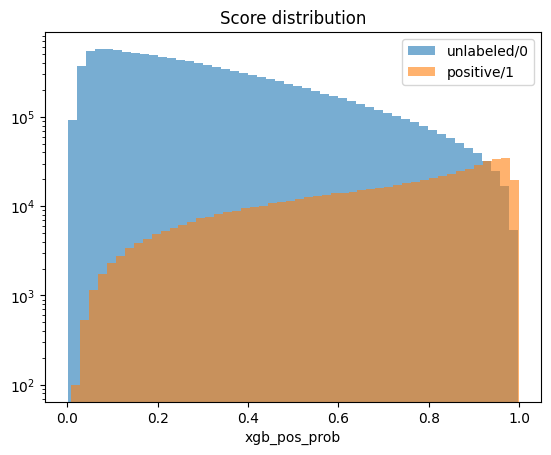

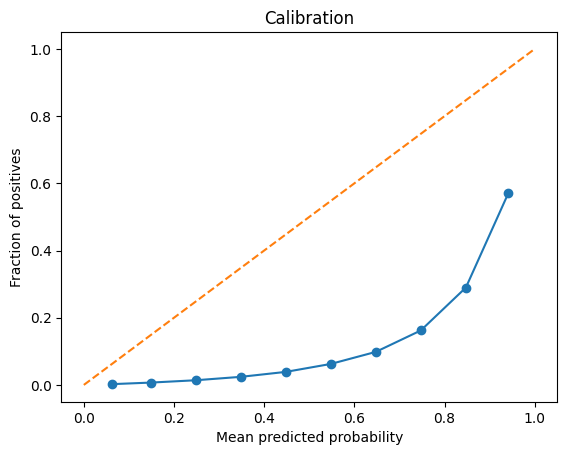

AUPRC = 0.37135837150181433


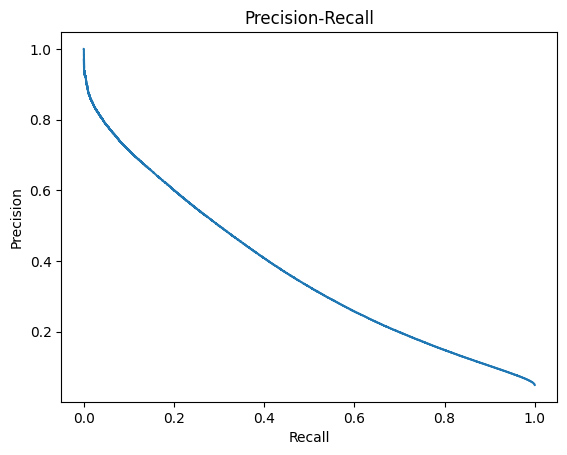

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, auc, RocCurveDisplay

DATA_DIR = Path("/home/mpradhan/Intern_Research_Project/data")
df  = pd.read_csv(DATA_DIR / "y_prob_compare_04.csv")   # columns: label, xgb_pos_prob
pos = df.query("label == 1")["xgb_pos_prob"]
ul  = df.query("label == 0")["xgb_pos_prob"]

# 1-a  Histogram by class
plt.figure()
plt.hist(ul, bins=50, alpha=0.6, label="unlabeled/0")
plt.hist(pos, bins=50, alpha=0.6, label="positive/1")
plt.yscale("log"); plt.legend(); plt.xlabel("xgb_pos_prob"); plt.title("Score distribution")
plt.show()

# 1-b  Reliability / calibration curve
prob_true, prob_pred = calibration_curve(df["label"], df["xgb_pos_prob"], n_bins=10)
plt.figure(); plt.plot(prob_pred, prob_true, marker="o"); plt.plot([0,1],[0,1],"--")
plt.xlabel("Mean predicted probability"); plt.ylabel("Fraction of positives")
plt.title("Calibration"); plt.show()

# 1-c  Precision-Recall
prec, rec, _ = precision_recall_curve(df["label"], df["xgb_pos_prob"])
print("AUPRC =", auc(rec, prec))
plt.figure(); plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall"); plt.show()

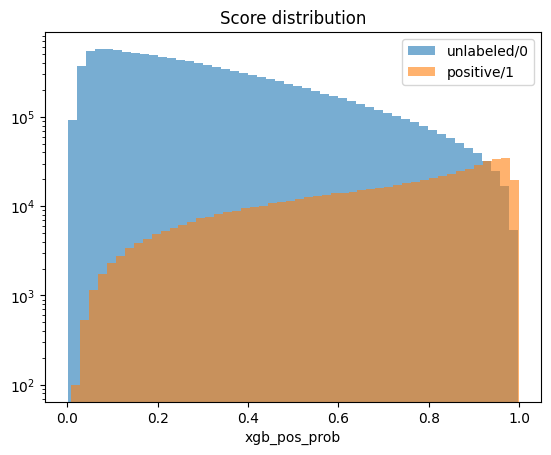

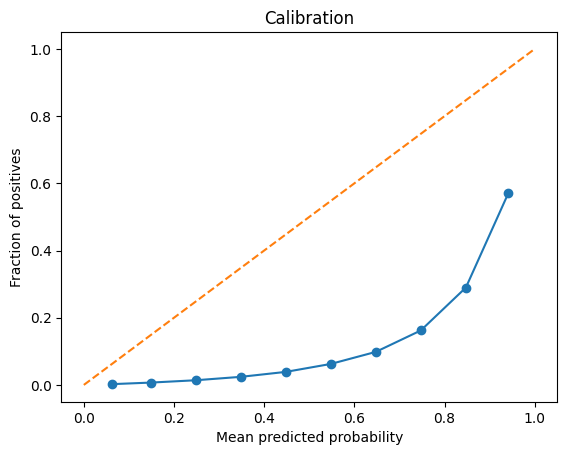

AUPRC = 0.37135837150181433


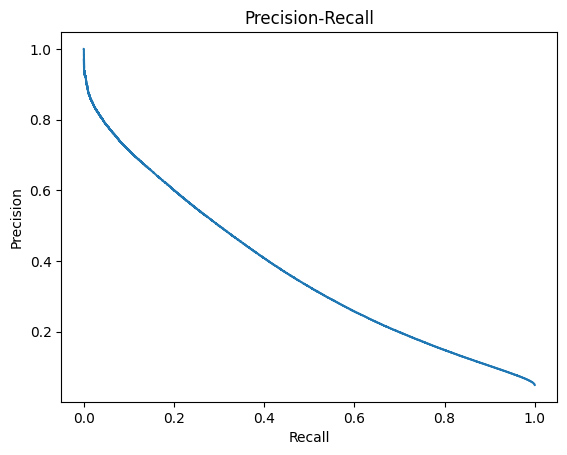

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, auc, RocCurveDisplay

DATA_DIR = Path("/home/mpradhan/Intern_Research_Project/data")
df  = pd.read_csv(DATA_DIR / "y_prob_compare_04.csv")   # columns: label, xgb_pos_prob
pos = df.query("label == 1")["xgb_pos_prob"]
ul  = df.query("label == 0")["xgb_pos_prob"]

# 1-a  Histogram by class
plt.figure()
plt.hist(ul, bins=50, alpha=0.6, label="unlabeled/0")
plt.hist(pos, bins=50, alpha=0.6, label="positive/1")
plt.yscale("log"); plt.legend(); plt.xlabel("xgb_pos_prob"); plt.title("Score distribution")
plt.show()

# 1-b  Reliability / calibration curve
prob_true, prob_pred = calibration_curve(df["label"], df["xgb_pos_prob"], n_bins=10)
plt.figure(); plt.plot(prob_pred, prob_true, marker="o"); plt.plot([0,1],[0,1],"--")
plt.xlabel("Mean predicted probability"); plt.ylabel("Fraction of positives")
plt.title("Calibration"); plt.show()

# 1-c  Precision-Recall
prec, rec, _ = precision_recall_curve(df["label"], df["xgb_pos_prob"])
print("AUPRC =", auc(rec, prec))
plt.figure(); plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall"); plt.show()

In [1]:
import pandas as pd
from pathlib import Path

# ---------------------------------------------------------------------
# 1.  Configure paths – update DATA_DIR if your folder is different
# ---------------------------------------------------------------------
DATA_DIR   = Path("/home/mpradhan/Intern_Research_Project/data")
prob_file  = DATA_DIR / "X_master_dense_prob.csv"   # has column xgb_pos_prob
label_file = DATA_DIR / "y_master.csv"              # single 0/1 column

# ---------------------------------------------------------------------
# 2.  Read files and build a combined DataFrame
# ---------------------------------------------------------------------
prob_df = pd.read_csv(prob_file, usecols=["xgb_pos_prob"])
labels  = pd.read_csv(label_file).squeeze("columns")   # Series

df = pd.concat([labels.rename("label"), prob_df["xgb_pos_prob"]], axis=1)

# ---------------------------------------------------------------------
# 3.  Count rows below each threshold
# ---------------------------------------------------------------------
thresholds = [0.1, 0.2, 0.8, 1.0]        # add or change values if needed
rows = []

for t in thresholds:
    mask = df["xgb_pos_prob"] < t
    rows.append({
        "threshold (<)": t,
        "total":       mask.sum(),
        "positives":   df.loc[mask, "label"].eq(1).sum(),
        "unlabeled":   df.loc[mask, "label"].eq(0).sum(),
    })

count_df = pd.DataFrame(rows)

# ---------------------------------------------------------------------
# 4.  Display or save
# ---------------------------------------------------------------------
# print(count_df)
# Optional: save to CSV
# count_df.to_csv(DATA_DIR / "counts_below_thresholds.csv", index=False)


In [2]:
print(count_df)

   threshold (<)     total  positives  unlabeled
0            0.1   2731990       5583    2726407
1            0.2   5483476      24409    5459067
2            0.8  12516375     349022   12167353
3            1.0  13219671     648392   12571279


In [3]:
import pandas as pd
from pathlib import Path

# ---------------------------------------------------------------------
# 1.  File locations  (edit if your paths differ)
# ---------------------------------------------------------------------
DATA_DIR   = Path("/home/mpradhan/Intern_Research_Project/data")
prob_file  = DATA_DIR / "X_master_dense_prob.csv"   # must include xgb_pos_prob
label_file = DATA_DIR / "y_master.csv"              # 0/1 column

# ---------------------------------------------------------------------
# 2.  Load data and combine into one DataFrame
# ---------------------------------------------------------------------
prob_df = pd.read_csv(prob_file, usecols=["xgb_pos_prob"])
labels  = pd.read_csv(label_file).squeeze("columns")      # Series
df      = pd.concat([labels.rename("label"), prob_df["xgb_pos_prob"]], axis=1)

# ---------------------------------------------------------------------
# 3.  Define 0.1-wide bins and count rows in each
# ---------------------------------------------------------------------
bin_edges = [i / 10 for i in range(11)] + [1.0]   # 0.0 … 1.0 (inclusive top edge)

rows = []
for low, high in zip(bin_edges[:-1], bin_edges[1:]):
    # last bin should include the right edge (==1.0)
    if high == 1.0:
        mask = (df["xgb_pos_prob"] >= low) & (df["xgb_pos_prob"] <= high)
        interval = f"[{low:.1f}, {high:.1f}]"
    else:
        mask = (df["xgb_pos_prob"] >= low) & (df["xgb_pos_prob"] <  high)
        interval = f"[{low:.1f}, {high:.1f})"
    
    rows.append({
        "prob_interval": interval,
        "total":        mask.sum(),
        "positives":    df.loc[mask, "label"].eq(1).sum(),
        "unlabeled":    df.loc[mask, "label"].eq(0).sum(),
    })

bin_counts = pd.DataFrame(rows)

# ---------------------------------------------------------------------
# 4.  Display or save
# ---------------------------------------------------------------------
print(bin_counts)
# Optional: save to CSV for plotting later
# bin_counts.to_csv(DATA_DIR / "counts_by_prob_bin.csv", index=False)


   prob_interval    total  positives  unlabeled
0     [0.0, 0.1)  2731990       5583    2726407
1     [0.1, 0.2)  2751486      18826    2732660
2     [0.2, 0.3)  2099666      29416    2070250
3     [0.3, 0.4)  1585914      38618    1547296
4     [0.4, 0.5)  1208595      46928    1161667
5     [0.5, 0.6)   922990      56502     866488
6     [0.6, 0.7)   698273      68274     629999
7     [0.7, 0.8)   517461      84875     432586
8     [0.8, 0.9)   393903     116931     276972
9     [0.9, 1.0]   309393     182439     126954
10    [1.0, 1.0]        0          0          0


In [4]:
import pandas as pd
from pathlib import Path

# ---------------------------------------------------------------------
# 1.  Paths (adjust if needed)
# ---------------------------------------------------------------------
DATA_DIR   = Path("/home/mpradhan/Intern_Research_Project/data")
prob_file  = DATA_DIR / "X_master_dense_prob.csv"
label_file = DATA_DIR / "y_master.csv"

# ---------------------------------------------------------------------
# 2.  Load and combine
# ---------------------------------------------------------------------
prob_df = pd.read_csv(prob_file, usecols=["xgb_pos_prob"])
labels  = pd.read_csv(label_file).squeeze("columns")
df      = pd.concat([labels.rename("label"), prob_df["xgb_pos_prob"]], axis=1)

# ---------------------------------------------------------------------
# 3.  Define bins and count per bin
# ---------------------------------------------------------------------
bin_edges = [i / 10 for i in range(11)] + [1.0]   # [0.0, 0.1), ..., [0.9, 1.0]

rows = []

N_total = len(df)
N_pos   = (df["label"] == 1).sum()
N_unl   = (df["label"] == 0).sum()

for low, high in zip(bin_edges[:-1], bin_edges[1:]):
    if high == 1.0:
        mask = (df["xgb_pos_prob"] >= low) & (df["xgb_pos_prob"] <= high)
        interval = f"[{low:.1f}, {high:.1f}]"
    else:
        mask = (df["xgb_pos_prob"] >= low) & (df["xgb_pos_prob"] <  high)
        interval = f"[{low:.1f}, {high:.1f})"
    
    total = mask.sum()
    pos   = df.loc[mask, "label"].eq(1).sum()
    unl   = df.loc[mask, "label"].eq(0).sum()
    
    rows.append({
        "prob_interval": interval,
        "total": total,
        "total_pct": 100 * total / N_total,
        "positives": pos,
        "positives_pct": 100 * pos / N_pos if N_pos > 0 else 0,
        "unlabeled": unl,
        "unlabeled_pct": 100 * unl / N_unl if N_unl > 0 else 0,
    })

bin_counts = pd.DataFrame(rows)

# ---------------------------------------------------------------------
# 4.  Display or save
# ---------------------------------------------------------------------
print(bin_counts)
# bin_counts.to_csv(DATA_DIR / "counts_by_prob_bin_with_pct.csv", index=False)


   prob_interval    total  total_pct  positives  positives_pct  unlabeled  \
0     [0.0, 0.1)  2731990  20.666097       5583       0.861053    2726407   
1     [0.1, 0.2)  2751486  20.813574      18826       2.903490    2732660   
2     [0.2, 0.3)  2099666  15.882891      29416       4.536762    2070250   
3     [0.3, 0.4)  1585914  11.996622      38618       5.955965    1547296   
4     [0.4, 0.5)  1208595   9.142398      46928       7.237597    1161667   
5     [0.5, 0.6)   922990   6.981944      56502       8.714173     866488   
6     [0.6, 0.7)   698273   5.282075      68274      10.529741     629999   
7     [0.7, 0.8)   517461   3.914326      84875      13.090075     432586   
8     [0.8, 0.9)   393903   2.979673     116931      18.033998     276972   
9     [0.9, 1.0]   309393   2.340399     182439      28.137145     126954   
10    [1.0, 1.0]        0   0.000000          0       0.000000          0   

    unlabeled_pct  
0       21.687586  
1       21.737327  
2       16.4680

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv(
    "/home/mpradhan/Intern_Research_Project/results/",
    sep="\t",
    comment="#",        # ignore comment lines
    na_filter=False,    # keep empty strings if you need them
    engine="python",    # more forgiving with weird quoting
)

EmptyDataError: No columns to parse from file

In [2]:
import pandas as pd
df = pd.read_csv('/home/mpradhan007/Academic/Research_Projects/PULSNAR_alpha_unlabeled_protein_residue/data/X_balanced_validation.csv')

In [3]:
df.head()

,cat__residue_name_ALA,cat__residue_name_ARG,cat__residue_name_ASN,cat__residue_name_ASP,cat__residue_name_CYS,cat__residue_name_GLN,cat__residue_name_GLU,cat__residue_name_GLY,cat__residue_name_HIS,cat__residue_name_ILE,...,num__psi,num__hbond_NH_O1_energy,num__hbond_NH_O2_energy,num__hbond_O_NH1_energy,num__hbond_O_NH2_energy,num__is_aromatic,num__is_polar,num__is_charged,num__is_hydrophobic,xgb_pos_prob
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.0,-2.6,-2.0,-0.2,1.0,0.0,0.0,0.0,1.0,0.016271
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.0,-1.4,-1.0,-0.2,-5.0,0.0,1.0,0.0,0.0,0.021888
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.0,-2.4,4.0,-2.0,1.0,0.0,1.0,0.0,0.0,0.012307
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.0,-1.3,-1.0,-0.2,1.0,0.0,0.0,1.0,0.0,0.777328
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-4.0,-2.3,4.0,-1.6,2.0,0.0,0.0,0.0,1.0,0.392187


In [4]:
df.shape

(718062, 129)

In [5]:
df = pd.read_csv('/home/mpradhan007/Academic/Research_Projects/PULSNAR_alpha_unlabeled_protein_residue/data/y_balanced_validation.csv')
df1 = pd.read_csv('/home/mpradhan007/Academic/Research_Projects/PULSNAR_alpha_unlabeled_protein_residue/data/y_balanced_true_validation.csv')

In [8]:
df.columns, df1.columns

(Index(['pu_label'], dtype='object'), Index(['true_label'], dtype='object'))

In [9]:
df.value_counts(), df1.value_counts()

(pu_label
 1           376256
 0           341806
 Name: count, dtype: int64,
 true_label
 1             418062
 0             300000
 Name: count, dtype: int64)